In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("who_suicide_statistics.csv")

In [3]:
data = dataset.copy(deep = True)

In [4]:
data.head(100)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
95,Albania,1992,male,75+ years,0.0,23900.0
96,Albania,1993,female,15-24 years,10.0,285300.0
97,Albania,1993,female,25-34 years,7.0,261800.0
98,Albania,1993,female,35-54 years,7.0,331200.0


In [5]:
data.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [6]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [7]:
print(data.isnull().sum())
print(data.shape)

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64
(43776, 6)


In [8]:
data.nunique()
#141 countries in the dataset
#Data of 38 years is stored

country          141
year              38
sex                2
age                6
suicides_no     2231
population     32439
dtype: int64

## Data Visualization

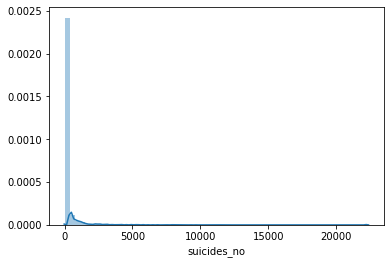

In [9]:
sns.distplot(data.suicides_no,bins=60)

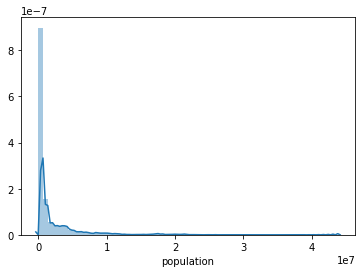

In [10]:
sns.distplot(data.population,bins=60)

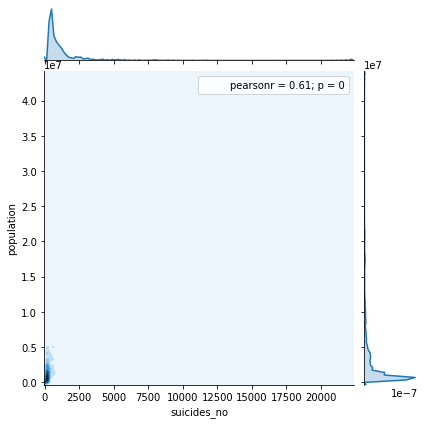

In [11]:
sns.jointplot( x ="suicides_no",y = "population",kind="kde",data = data).annotate(stats.pearsonr)

In [12]:
country_gb = data.groupby(by= "country")["suicides_no"].sum().reset_index()

In [13]:
country_gb.sort_values(by="suicides_no",ascending= False,inplace=True)

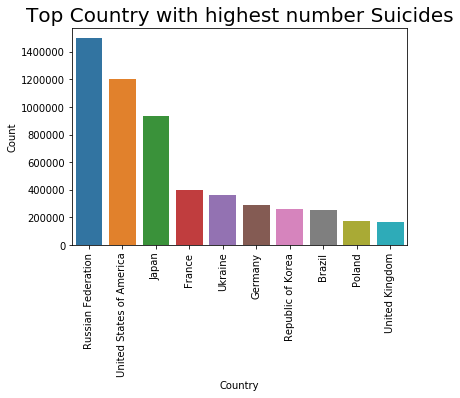

In [14]:
sns.barplot(x=country_gb.country.head(10),y = country_gb.suicides_no.head(10))
plt.title('Top Country with highest number Suicides', fontsize = 20)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [15]:
age_gb = data.groupby(by= "age")["suicides_no"].sum().reset_index()
age_gb.sort_values(by="suicides_no",ascending= False,inplace=True)

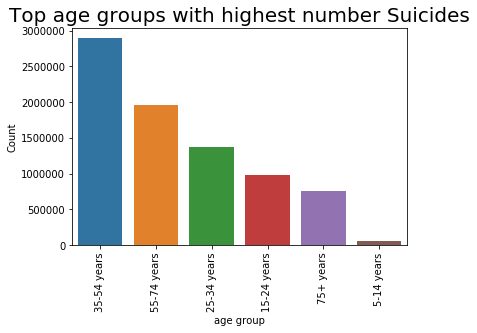

In [16]:
sns.barplot(x=age_gb.age.head(10),y = age_gb.suicides_no.head(10))
plt.title('Top age groups with highest number Suicides', fontsize = 20)
plt.xlabel('age group')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [17]:
sex_gb = data.groupby(by= "sex")["suicides_no"].sum().reset_index()
sex_gb.sort_values(by="suicides_no",ascending= False,inplace=True)

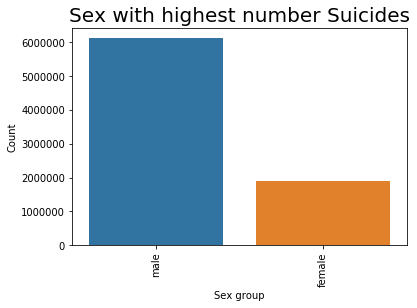

In [18]:
sns.barplot(x=sex_gb.sex.head(10),y = sex_gb.suicides_no.head(10))
plt.title('Sex with highest number Suicides', fontsize = 20)
plt.xlabel('Sex group')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

In [19]:
year_gb = data.groupby(by= "year")["suicides_no"].sum().reset_index()
year_gb.sort_values(by="suicides_no",ascending= False,inplace=True)

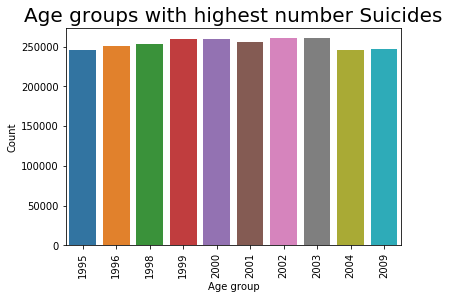

In [20]:
sns.barplot(x=year_gb.year.head(10),y = year_gb.suicides_no.head(10))
plt.title('Age groups with highest number Suicides', fontsize = 20)
plt.xlabel('Age group')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

## HANDELING CATEGORICAL DATA

In [21]:
Age = pd.get_dummies(data["age"],drop_first= True)
Sex = pd.get_dummies(data["sex"],drop_first=True)

In [22]:
data = pd.concat([data,Age,Sex],axis = 1)

In [23]:
data.drop(["sex","age"],axis = 1,inplace=True)

## HANDELING THE MISSING VALUES:
### 1) Removing all the Null Values and create a model to predict the suicide dataset

In [24]:
print("99.6% population lie in: {}".format((data.population.mean()+(3*data.population.std()))))

99.6% population lie in: 12605784.817836404


In [25]:
df = data[(data.population < 12605784.817836404)]

In [26]:
df.shape

(37413, 10)

Text(0.5, 1.0, 'Mean is : 1224164.1111645685')

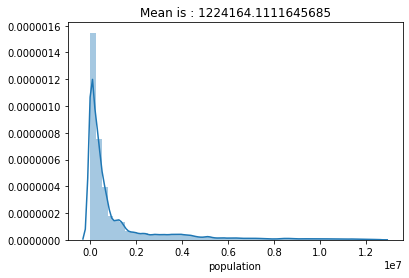

In [27]:
sns.distplot(df.population)
plt.title("Mean is : {}".format(df.population.mean()))

In [28]:
df.isnull().sum()

country           0
year              0
suicides_no    2240
population        0
25-34 years       0
35-54 years       0
5-14 years        0
55-74 years       0
75+ years         0
male              0
dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm

In [30]:
def result(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    rfc = RandomForestRegressor()
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    print("Train Data Accuracy {0} ".format(rfc.score(X_train, y_train)))
    print("Test Data Accuracy {0} ".format(rfc.score(X_test, y_test)))

In [31]:
def resultLinearRegression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print("Train Data Accuracy {0} ".format(lr.score(X_train, y_train)))
    print("Test Data Accuracy {0} ".format(lr.score(X_test, y_test)))

In [96]:
def svm_mod(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = svm.SVC()
    model.fit(X_train,y_train)
    prediction=model.predict(X_val)

In [32]:
df.dropna(axis=0,inplace = True)
df.isnull().sum()
df.shape

(35173, 10)

In [33]:
X = df.loc[:,["year","population","25-34 years","35-54 years","5-14 years","55-74 years","75+ years","male"]]

In [34]:
y = df.loc[:,"suicides_no"]

In [35]:
result(X,y)

Train Data Accuracy 0.9718192668110978 
Test Data Accuracy 0.774547581266239 


In [36]:
resultLinearRegression(X,y)

Train Data Accuracy 0.3427426500348484 
Test Data Accuracy 0.334451009208086 


### 2) Creating a model to predict the missing values in population column and then use population to predict suicides_no 

In [37]:
(data.population.isnull() & data.suicides_no.isnull()).sum()
#Hence there is no common missing value between the two continous variable

0

In [38]:
df1 = data.copy(deep= True)

In [39]:
condition1 = df1.suicides_no.isna()

In [40]:
p = df1[condition1]

In [41]:
index1 = p.index

In [42]:
df2 = df1.drop(axis=0,index = index1)

In [43]:
df2.isnull().sum()

country           0
year              0
suicides_no       0
population     5460
25-34 years       0
35-54 years       0
5-14 years        0
55-74 years       0
75+ years         0
male              0
dtype: int64

In [44]:
condition2 = df2.population.isna()

In [45]:
X_test = df2[condition2]

In [46]:
X_test = X_test.iloc[:,[1,2,4,5,6,7,8,9]]

In [47]:
index2 = X_test.index

In [48]:
df2.drop(axis=0,index = index2,inplace=True)

In [49]:
df2.isnull().sum()

country        0
year           0
suicides_no    0
population     0
25-34 years    0
35-54 years    0
5-14 years     0
55-74 years    0
75+ years      0
male           0
dtype: int64

In [50]:
df2.shape

(36060, 10)

In [51]:
X_train = df2.iloc[:,[1,2,4,5,6,7,8,9]]
y_train = df2.iloc[:,3]

In [52]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [53]:
y_pred = list(y_pred)
index2 =list(index2)


In [54]:
dic = {}
for i in range(len(index2)):
    dic[index2[i]] = y_pred[i]

In [55]:
df1.population.fillna(value = dic, inplace= True)

In [56]:
df1.isnull().sum()

country           0
year              0
suicides_no    2256
population        0
25-34 years       0
35-54 years       0
5-14 years        0
55-74 years       0
75+ years         0
male              0
dtype: int64

##  Now as we have filled the missing "population" variable it's time to work on missing values of  "suicides_no" variable
### 2.1) drop the missing values of suicide_no
### 2.2) replace it with mode of the variable
### 2.3) replace it with mean of the variable
### 2.4) replace it with median of the variable

## 2.1)

In [57]:
df3 = df1.copy(deep = True)

In [58]:
df3.dropna(inplace=True,axis = 0)

In [59]:
df3.shape

(41520, 10)

In [60]:
X = df3.iloc[:,[1,3,4,5,6,7,8,9]]
y = df3.iloc[:,2]

In [61]:
result(X,y)

Train Data Accuracy 0.97768212964781 
Test Data Accuracy 0.8696363797456049 


## 2.2)

In [62]:
df4 = df1.copy(deep=True)

In [63]:
df4.suicides_no.value_counts()

0.0       9299
1.0       2614
2.0       1696
3.0       1283
4.0       1024
          ... 
2494.0       1
1475.0       1
3076.0       1
828.0        1
2628.0       1
Name: suicides_no, Length: 2231, dtype: int64

In [64]:
df4.suicides_no.fillna(value=0,inplace=True)

In [65]:
X = df4.iloc[:,[1,3,4,5,6,7,8,9]]
y = df4.iloc[:,2]

In [66]:
result(X,y)

Train Data Accuracy 0.9754986302398391 
Test Data Accuracy 0.8280066388265485 


## 2.3)

In [67]:
df5 = df1.copy(deep=True)

In [68]:
df5.suicides_no.mean()

193.3153901734104

In [69]:
df5.suicides_no.fillna(value=193,inplace=True)

In [70]:
X = df5.iloc[:,[1,3,4,5,6,7,8,9]]
y = df5.iloc[:,2]

In [71]:
result(X,y)

Train Data Accuracy 0.9741690429547556 
Test Data Accuracy 0.8189897724957961 


## 2.4)

In [72]:
df6 = df1.copy(deep=True)

In [73]:
df6.suicides_no.median()

14.0

In [74]:
df6.suicides_no.fillna(value=14,inplace=True)

In [75]:
X = df6.iloc[:,[1,3,4,5,6,7,8,9]]
y = df6.iloc[:,2]

In [76]:
result(X,y)

Train Data Accuracy 0.9750181570641815 
Test Data Accuracy 0.8308151221883333 


## 3) Filling the population variable with mean of population

In [77]:
data.isnull().sum()

country           0
year              0
suicides_no    2256
population     5460
25-34 years       0
35-54 years       0
5-14 years        0
55-74 years       0
75+ years         0
male              0
dtype: int64

In [78]:
data1 = data.copy(deep = True)

In [79]:
mean = data1.population.mean()
mean

1664091.1353742562

In [80]:
data1['population'].fillna(1664091.1353743759,inplace = True)

In [81]:
data1.isnull().sum()

country           0
year              0
suicides_no    2256
population        0
25-34 years       0
35-54 years       0
5-14 years        0
55-74 years       0
75+ years         0
male              0
dtype: int64

#  Now as we have filled the missing "population" variable it's time to work on missing values of  "suicides_no" variable
### 3.1) drop the missing values of suicide_no
### 3.2) replace it with mode of the variable
### 3.3) replace it with mean of the variable
### 3.4) replace it with median of the variable

## 3.1)

In [82]:
df_1 = data1.copy(deep=True)

In [83]:
df_1.dropna(axis = 0,inplace =True)

In [84]:
df_1.head()

,country,year,suicides_no,population,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,male
24,Albania,1987,14.0,289700.0,0,0,0,0,0,0
25,Albania,1987,4.0,257200.0,1,0,0,0,0,0
26,Albania,1987,6.0,278800.0,0,1,0,0,0,0
27,Albania,1987,0.0,311000.0,0,0,1,0,0,0
28,Albania,1987,0.0,144600.0,0,0,0,1,0,0


In [85]:
X = df_1.iloc[:,[1,3,4,5,6,7,8,9]]
y = df_1.iloc[:,[2]]

In [86]:
result(X,y)

Train Data Accuracy 0.9769155468314374 
Test Data Accuracy 0.866204484364402 


## 3.2) 

In [87]:
df_2 = data1.copy(deep =True)

In [88]:
df_2.suicides_no.fillna(0,inplace = True)

In [89]:
X = df_2.iloc[:,[1,3,4,5,6,7,8,9]]
y = df_2.iloc[:,[2]]

In [90]:
result(X,y)

Train Data Accuracy 0.9740767182435581 
Test Data Accuracy 0.834858512054119 


## 3.3) 

In [91]:
df_3 = data1.copy(deep = True)

In [92]:
df_3.suicides_no.fillna(value=df_3.suicides_no.mean(),inplace=True)

In [93]:
X = df_3.iloc[:,[1,3,4,5,6,7,8,9]]
y = df_3.iloc[:,[2]]

In [94]:
result(X,y)

Train Data Accuracy 0.9758161525430623 
Test Data Accuracy 0.8272051708394906 


## Hence we can with 87% Accuracy predict the suicides_no(target variable)